In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [5]:
from pandas_datareader import wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os, time
from wb_api_wraper import *

In [3]:
#Names to WB names
any_to_wb = pd.read_csv("inputs/any_name_to_wb_name.csv",index_col="any",squeeze=True)

#iso3 to wb country name table
iso3_to_wb=pd.read_csv("inputs/iso3_to_wb_name.csv").set_index("iso3").squeeze()

#iso2 to iso3 table
iso2_iso3 = pd.read_csv("inputs/names_to_iso.csv", usecols=["iso2","iso3"]).drop_duplicates().set_index("iso2").squeeze() #the tables has more lines than countries to account for several ways of writing country names

In [6]:
#World Development Indicators
gdp_pc_pp    = get_wb_mrv('NY.GDP.PCAP.pp.kd',"gdp_pc_pp")#Gdp per capita ppp
pop          = get_wb_mrv('SP.POP.TOTL'      ,"pop")#population
#ppp_over_mer = get_wb_mrv('PA.NUS.PPPC.RF',"ppp_over_mer")#conversion factor PPP over MER
gdp_pc_cd=get_wb_mrv('ny.gdp.pcap.cd'   ,"gdp_pc_cd")#gdp per capita mer
# gap2     =get_wb_mrv('1.0.PGap.2.5usd'  ,"gap2")#poverty gap at 2$
# head2    =get_wb_mrv('SI.POV.2DAY'      ,"head2")# povety count at 2$
gini       = get_wb_mrv('SI.POV.GINI',"gini")

In [10]:
data_folder = "transport_rai_output_data/"

In [33]:
rai = pd.DataFrame()
for scenario in ["RAI_PS","RAI_PST","RAI_PSTT"]:
    x = pd.read_excel(data_folder+"RAI_WorldPop.xlsx",sheetname=scenario)
    x["scenario"] = scenario
    rai = rai.append(x)

In [34]:
rai["country"] = rai.Country.replace(any_to_wb)
rai = rai.drop("Country",axis=1)

In [36]:
out = rai.set_index(["country","scenario"]).RAI.unstack("scenario")

In [37]:
out['increase'] = out.RAI_PSTT-out.RAI_PS

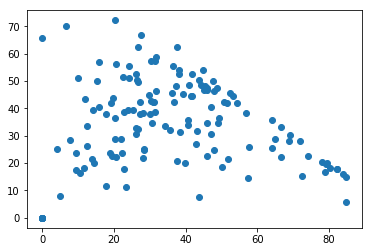

In [40]:
plt.scatter(out.RAI_PS,out.increase)

In [41]:
roads = pd.read_excel("Elco results\output_data\length_roads.xlsx")
roads["country"] = roads.Country.replace(any_to_wb)
roads = roads.fillna(0).drop("Country",axis=1)
roads = roads.set_index("country")
roads.columns.name = "road_type"
roads = roads.stack().reset_index().rename(columns={0:"km"})

In [42]:
roads

,country,road_type,km
0,Afghanistan,other,507.711221
1,Afghanistan,primary,6608.391766
2,Afghanistan,secondary,5537.112639
3,Afghanistan,tertiary,38426.022002
4,Afghanistan,track,57084.453671
5,Angola,other,343.306107
6,Angola,primary,8824.373143
7,Angola,secondary,8352.878989
8,Angola,tertiary,70977.249347
9,Angola,track,10847.372003


In [12]:
pd.read_excel(data_folder+"RAI_gpw.xlsx")

,Country,Pop Rural Total,Pop Rural < 2km,RAI
0,Afghanistan,2.493893e+07,5.628974e+06,22.571033
1,Angola,2.130044e+07,2.928206e+06,13.747162
2,Albania,1.333119e+06,7.511979e+05,56.348890
3,Argentina,2.211754e+07,5.678439e+06,25.673921
4,Armenia,1.107564e+06,2.055957e+05,18.562878
5,American Samoa,5.666631e+03,4.791430e+03,84.555167
6,Azerbaijan,5.946369e+06,1.621208e+06,27.263828
7,Burundi,8.868071e+06,5.567524e+06,62.781686
8,Benin,9.145383e+06,2.773378e+06,30.325440
9,Burkina Faso,1.692824e+07,3.029180e+06,17.894240


In [13]:
pd.read_excel(data_folder+"RAI_SSP3.xlsx")

,Country,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,Afghanistan,17.220670,17.805654,17.074742,16.162747,15.923948,15.489007,14.880107,14.602849,14.200263,13.622287,13.313094
1,Angola,8.588595,6.010599,5.802828,5.795954,5.615336,5.600894,5.634318,5.672812,5.720083,5.738772,5.723211
2,Albania,47.844150,41.523880,41.071438,41.177265,40.778982,41.026282,40.700578,40.816159,40.619968,40.021070,39.789884
3,Argentina,33.165816,22.874945,21.467091,20.531422,19.582538,19.478369,18.519383,18.522382,19.222210,18.470014,18.474210
4,Armenia,14.309439,10.790021,10.296645,10.645945,10.826446,11.082928,11.283880,11.457051,11.546049,11.705900,11.937337
5,Azerbaijan,33.744276,31.885145,31.771467,31.299539,30.898628,30.593267,30.349441,29.927482,30.081679,29.947702,29.376865
6,Burundi,63.591196,63.727840,63.763888,63.272809,62.714234,62.242540,62.184134,62.037843,61.897960,61.736649,61.564818
7,Benin,32.359514,25.646890,25.312831,24.656292,24.093138,23.902637,23.729837,23.676495,23.428250,22.905684,22.452040
8,Burkina Faso,18.848503,15.395510,14.654477,14.450542,14.067732,13.695704,13.341559,13.250595,12.948846,12.853652,12.811999
9,Bangladesh,24.333110,44.891384,44.808046,44.792375,44.531465,44.360715,44.231430,44.094778,43.860091,43.634430,43.538115
